In [ ]:
!mkdir scripts

In [ ]:
import pandas as pd

import os, sys
sys.path.insert(0, 'scripts')

# import the script module to fetch the data set 
from scripts import flaskdata_superset
def isolationforest_main(input_data=None):
  # if the function doesn't get any input then
  #  call the FlaskData api to get the superset - table data
  if input_data==None:
     # NOTE: e.g. below shows for table_name = adverse-events-subset, you substitute with the table name
     # that you need to fetch ...
     table_name = 'adtte_time_to_event'
     # call to fetch data from flaskdata superset as a pandas dataframe
     df = flaskdata_superset.get_data(table_name)
     #.... processing with the isolation forest algorithm
	
  return output

In [ ]:
import pandas as pd
from scripts import flaskdata_superset as fs
df_adtte = fs.get_data('adtte_time_to_event')

In [ ]:
df_adtte.head()

,STUDYID,USUBJID,SUBJID,INVID,RANDDT,ITTFL,SAFFL,TRTP,TRTPN,TRTA,TRTAN,PTAXN,PTAX,VMETAN,VMETA,HRN,HR,GEOREGN,GEOREG,RACE,RACEN,RACEGR1,RACEGR1N,AGEGR1,AGEGR1N,ECOGGR1,ECOGGR1N,REGST,REGSTN,NBSTGR1,NBSTGR1N,LESTYP,LESTYPN,DFIGR1,DFIGR1N,ERSTGR1,ERSTGR1N,PRSTGR1,PRSTGR1N,TRPNEGFL,PHTXFL,PCTXFL,PACTFL,PAFL,PARAM,PARAMCD,PARAMTYP,PARCAT1,STARTDT,ADT,AVAL,CNSR,EVNTDESC,EVNTDSCN,AVALCAT,AVALCATN,CNSRDSC,CNSRDSCN
0,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,2012-09-07T00:00:00.000Z,Y,Y,Placebo + Docetaxel,0,Placebo + Docetaxel,0.0,1,Yes,1,Yes,1,Positive,2,Europe/Australia/New-Zealand,WHITE,1,WHITE,0,< 65,0,ECOG 0,0,METASTATIC BREAST CANCER,1,< 3,1,NON-MEASURABLE,1,< 24,1,POSITIVE,1,NEGATIVE/UNKNOWN,0,N,Y,Y,Y,Y,Independent Review Committee,IRC,DERIVED,Progression-free survival (months),2012-09-07,2012-12-05T00:00:00.000Z,2.956879,1.0,No Progression,2.0,None,NaN,Death or Progression After Two or More Missed ...,3.0
1,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,2012-09-07T00:00:00.000Z,Y,Y,Placebo + Docetaxel,0,Placebo + Docetaxel,0.0,1,Yes,1,Yes,1,Positive,2,Europe/Australia/New-Zealand,WHITE,1,WHITE,0,< 65,0,ECOG 0,0,METASTATIC BREAST CANCER,1,< 3,1,NON-MEASURABLE,1,< 24,1,POSITIVE,1,NEGATIVE/UNKNOWN,0,N,Y,Y,Y,Y,Independent Review Committee SAP-Sensitivity 9,IRC-se9,DERIVED,Progression-free survival (months),2012-09-07,2013-12-14T00:00:00.000Z,15.244353,0.0,None,NaN,Death,2.0,None,NaN
2,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,2012-09-07T00:00:00.000Z,Y,Y,Placebo + Docetaxel,0,Placebo + Docetaxel,0.0,1,Yes,1,Yes,1,Positive,2,Europe/Australia/New-Zealand,WHITE,1,WHITE,0,< 65,0,ECOG 0,0,METASTATIC BREAST CANCER,1,< 3,1,NON-MEASURABLE,1,< 24,1,POSITIVE,1,NEGATIVE/UNKNOWN,0,N,Y,Y,Y,Y,Independent Review Committee Reader 1,IRC_R1,DERIVED,Progression-free survival (months),2012-09-07,2012-12-05T00:00:00.000Z,2.956879,1.0,No Progression,2.0,None,NaN,Death or Progression After Two or More Missed ...,3.0
3,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,2012-09-07T00:00:00.000Z,Y,Y,Placebo + Docetaxel,0,Placebo + Docetaxel,0.0,1,Yes,1,Yes,1,Positive,2,Europe/Australia/New-Zealand,WHITE,1,WHITE,0,< 65,0,ECOG 0,0,METASTATIC BREAST CANCER,1,< 3,1,NON-MEASURABLE,1,< 24,1,POSITIVE,1,NEGATIVE/UNKNOWN,0,N,Y,Y,Y,Y,Independent Review Committee Reader 2,IRC_R2,DERIVED,Progression-free survival (months),2012-09-07,2012-12-07T00:00:00.000Z,3.020587,1.0,No Progression,2.0,None,NaN,Death or Progression After Two or More Missed ...,3.0
4,CP12-0606,CP12-0606/1192-1207,1192-1207,INQ6663,2012-09-07T00:00:00.000Z,Y,Y,Placebo + Docetaxel,0,Placebo + Docetaxel,0.0,1,Yes,1,Yes,1,Positive,2,Europe/Australia/New-Zealand,WHITE,1,WHITE,0,< 65,0,ECOG 0,0,METASTATIC BREAST CANCER,1,< 3,1,NON-MEASURABLE,1,< 24,1,POSITIVE,1,NEGATIVE/UNKNOWN,0,N,Y,Y,Y,Y,Investigator,INV,DERIVED,Progression-free survival (months),2012-09-07,2012-12-07T00:00:00.000Z,3.020587,1.0,No Progression,2.0,None,NaN,Death or Progression After Two or More Missed ...,3.0


In [ ]:
df_adtte.shape

(14870, 58)

In [ ]:
!pip install missingno

In [ ]:
df_adtte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14870 entries, 0 to 14869
Data columns (total 58 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   14870 non-null  object 
 1   USUBJID   14870 non-null  object 
 2   SUBJID    14870 non-null  object 
 3   INVID     14870 non-null  object 
 4   RANDDT    14870 non-null  object 
 5   ITTFL     14870 non-null  object 
 6   SAFFL     14870 non-null  object 
 7   TRTP      14870 non-null  object 
 8   TRTPN     14870 non-null  int64  
 9   TRTA      14794 non-null  object 
 10  TRTAN     14794 non-null  float64
 11  PTAXN     14870 non-null  int64  
 12  PTAX      14870 non-null  object 
 13  VMETAN    14870 non-null  int64  
 14  VMETA     14870 non-null  object 
 15  HRN       14870 non-null  int64  
 16  HR        14870 non-null  object 
 17  GEOREGN   14870 non-null  int64  
 18  GEOREG    14870 non-null  object 
 19  RACE      14870 non-null  object 
 20  RACEN     14870 non-null  in

In [ ]:
df_adtte.describe()

,TRTPN,TRTAN,PTAXN,VMETAN,HRN,GEOREGN,RACEN,RACEGR1N,AGEGR1N,ECOGGR1N,REGSTN,NBSTGR1N,LESTYPN,DFIGR1N,ERSTGR1N,PRSTGR1N,AVAL,CNSR,EVNTDSCN,AVALCATN,CNSRDSCN
count,14870.0,14794.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,14870.000000,13385.000000,1540.000000,4175.000000,1586.000000
mean,0.0,0.002569,0.266577,0.716611,0.767653,1.888702,1.269536,0.114593,0.155817,0.377337,0.982044,0.518763,0.184465,1.318494,0.749428,0.611970,8.664288,0.479940,1.420130,1.158563,4.862421
std,0.0,0.050618,0.442184,0.450659,0.422343,0.590735,0.899245,0.318541,0.362694,0.484737,0.132795,0.499665,0.387876,0.822608,0.433357,0.487318,9.772340,0.499616,0.534195,0.491185,1.991189
min,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.792608,0.000000,1.000000,1.000000,3.000000
50%,0.0,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,5.749487,0.000000,1.000000,1.000000,5.000000
75%,0.0,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,10.316202,1.000000,2.000000,1.000000,6.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,68.336756,1.000000,3.000000,5.000000,9.000000


In [ ]:
num_vars= df_adtte.columns[df_adtte.dtypes !='object']
cat_vars= df_adtte.columns[df_adtte.dtypes =='object']
print('numeric variable', num_vars)
print('categorical variable', cat_vars)

numeric variable Index(['TRTPN', 'TRTAN', 'PTAXN', 'VMETAN', 'HRN', 'GEOREGN', 'RACEN',
       'RACEGR1N', 'AGEGR1N', 'ECOGGR1N', 'REGSTN', 'NBSTGR1N', 'LESTYPN',
       'DFIGR1N', 'ERSTGR1N', 'PRSTGR1N', 'AVAL', 'CNSR', 'EVNTDSCN',
       'AVALCATN', 'CNSRDSCN'],
      dtype='object')
categorical variable Index(['STUDYID', 'USUBJID', 'SUBJID', 'INVID', 'RANDDT', 'ITTFL', 'SAFFL',
       'TRTP', 'TRTA', 'PTAX', 'VMETA', 'HR', 'GEOREG', 'RACE', 'RACEGR1',
       'AGEGR1', 'ECOGGR1', 'REGST', 'NBSTGR1', 'LESTYP', 'DFIGR1', 'ERSTGR1',
       'PRSTGR1', 'TRPNEGFL', 'PHTXFL', 'PCTXFL', 'PACTFL', 'PAFL', 'PARAM',
       'PARAMCD', 'PARAMTYP', 'PARCAT1', 'STARTDT', 'ADT', 'EVNTDESC',
       'AVALCAT', 'CNSRDSC'],
      dtype='object')


In [ ]:
df_adtte.isna().sum()

STUDYID         0
USUBJID         0
SUBJID          0
INVID           0
RANDDT          0
ITTFL           0
SAFFL           0
TRTP            0
TRTPN           0
TRTA           76
TRTAN          76
PTAXN           0
PTAX            0
VMETAN          0
VMETA           0
HRN             0
HR              0
GEOREGN         0
GEOREG          0
RACE            0
RACEN           0
RACEGR1         0
RACEGR1N        0
AGEGR1          0
AGEGR1N         0
ECOGGR1         0
ECOGGR1N        0
REGST           0
REGSTN          0
NBSTGR1         0
NBSTGR1N        0
LESTYP          0
LESTYPN         0
DFIGR1          0
DFIGR1N         0
ERSTGR1         0
ERSTGR1N        0
PRSTGR1         0
PRSTGR1N        0
TRPNEGFL        0
PHTXFL          0
PCTXFL          0
PACTFL          0
PAFL            0
PARAM           0
PARAMCD         0
PARAMTYP        0
PARCAT1         0
STARTDT         0
ADT             0
AVAL            0
CNSR         1485
EVNTDESC    13330
EVNTDSCN    13330
AVALCAT     10695
AVALCATN  

In [ ]:
import pandas as pd
from scripts import flaskdata_superset as fdss
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

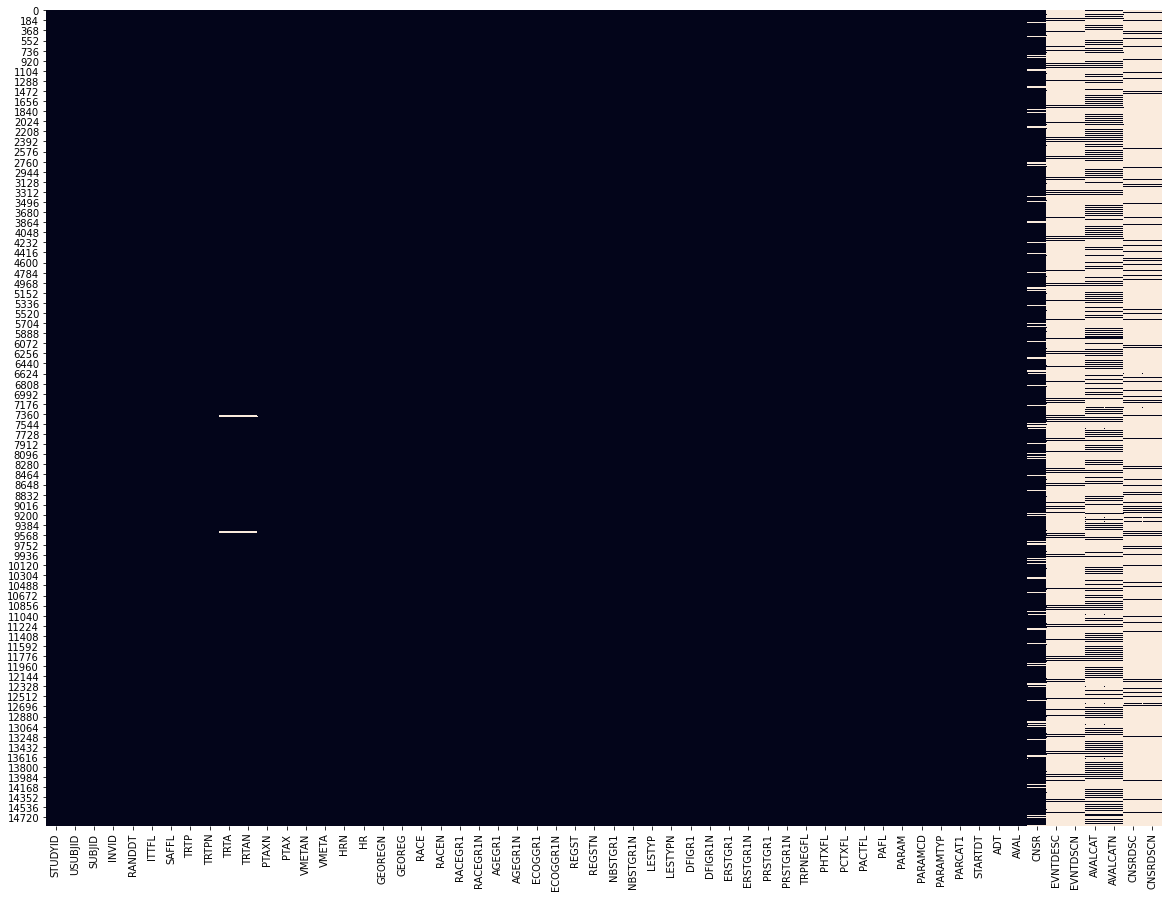

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_adtte.isnull(), cbar=False ,ax=ax)

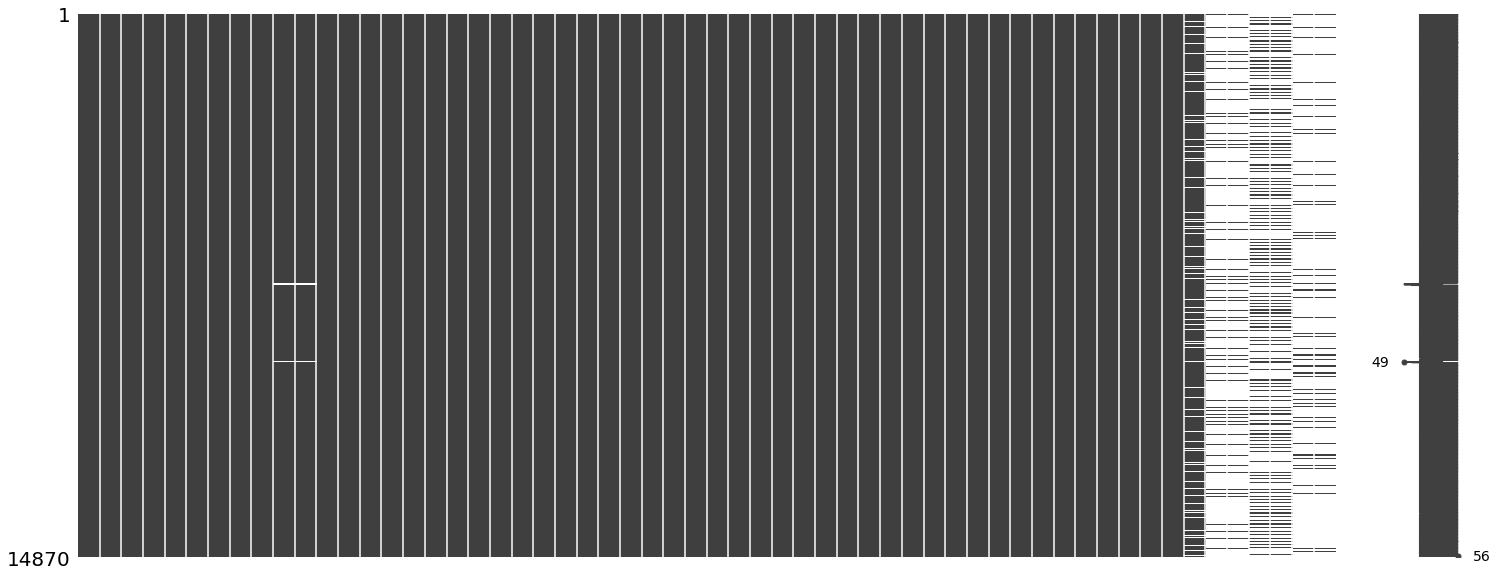

In [ ]:
msno.matrix(df_adtte ,sparkline=True)

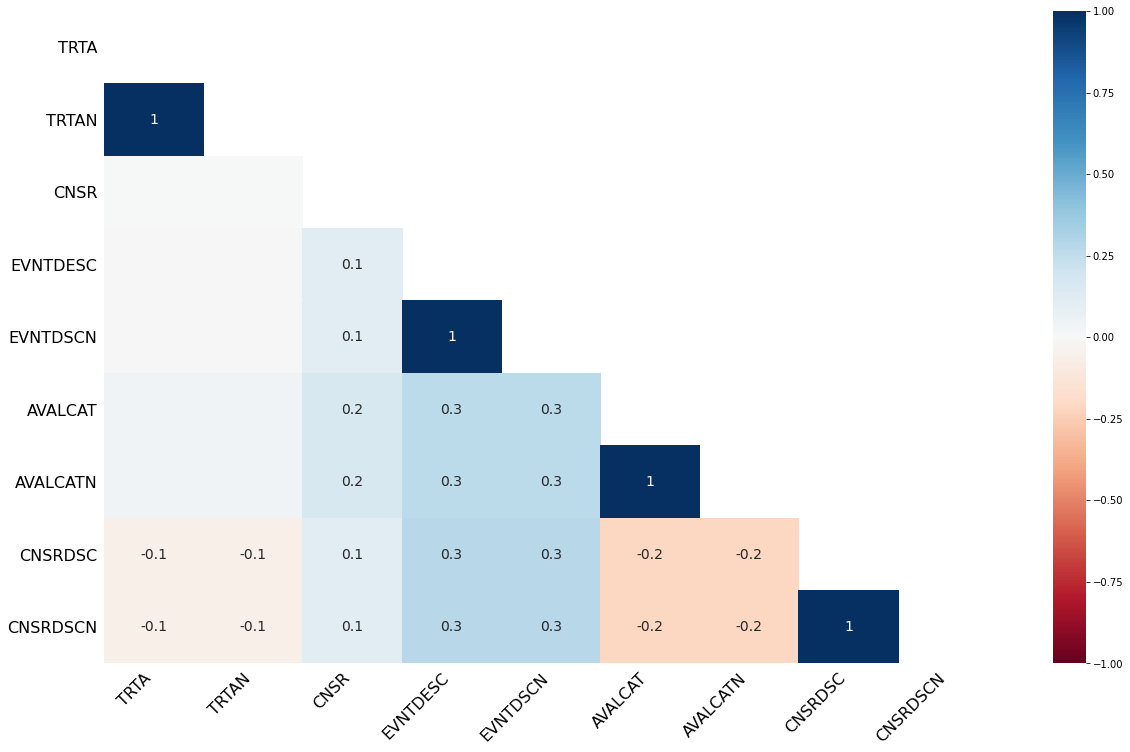

In [ ]:
msno.heatmap(df_adtte)

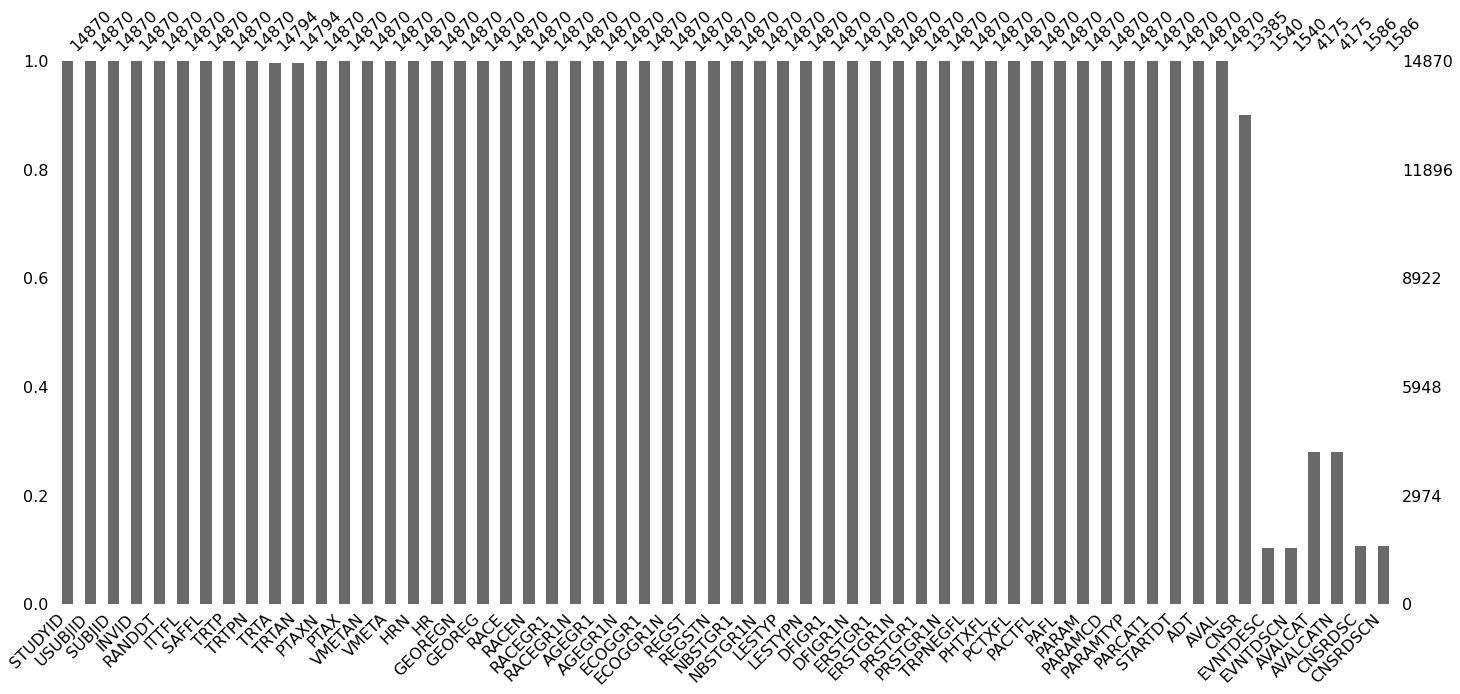

In [ ]:
msno.bar(df_adtte,labels = True)

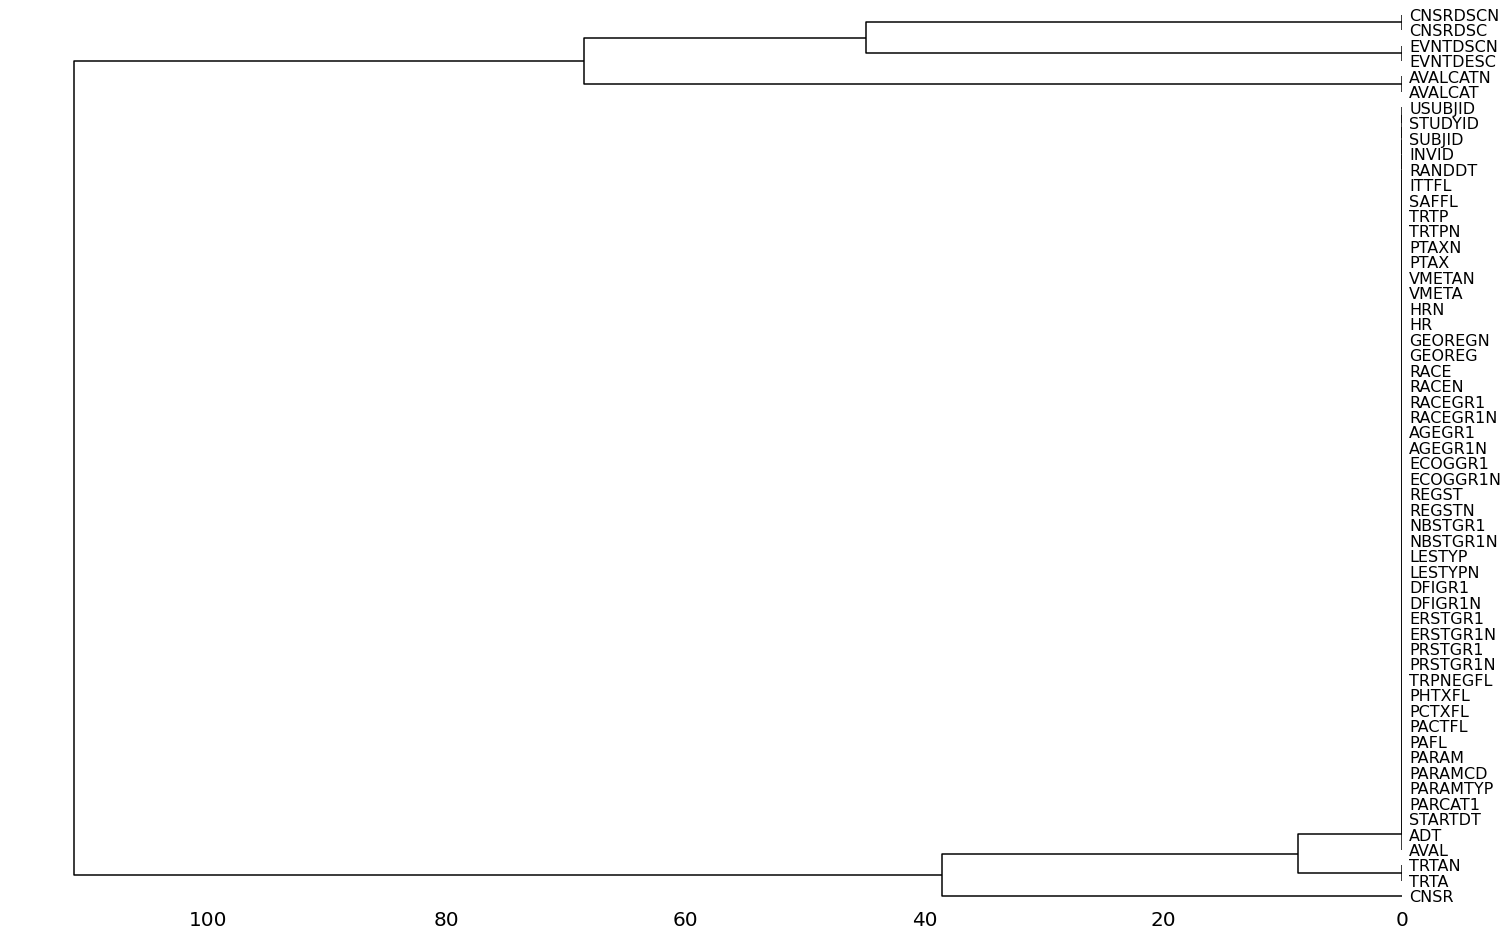

In [ ]:
msno.dendrogram(df_adtte)

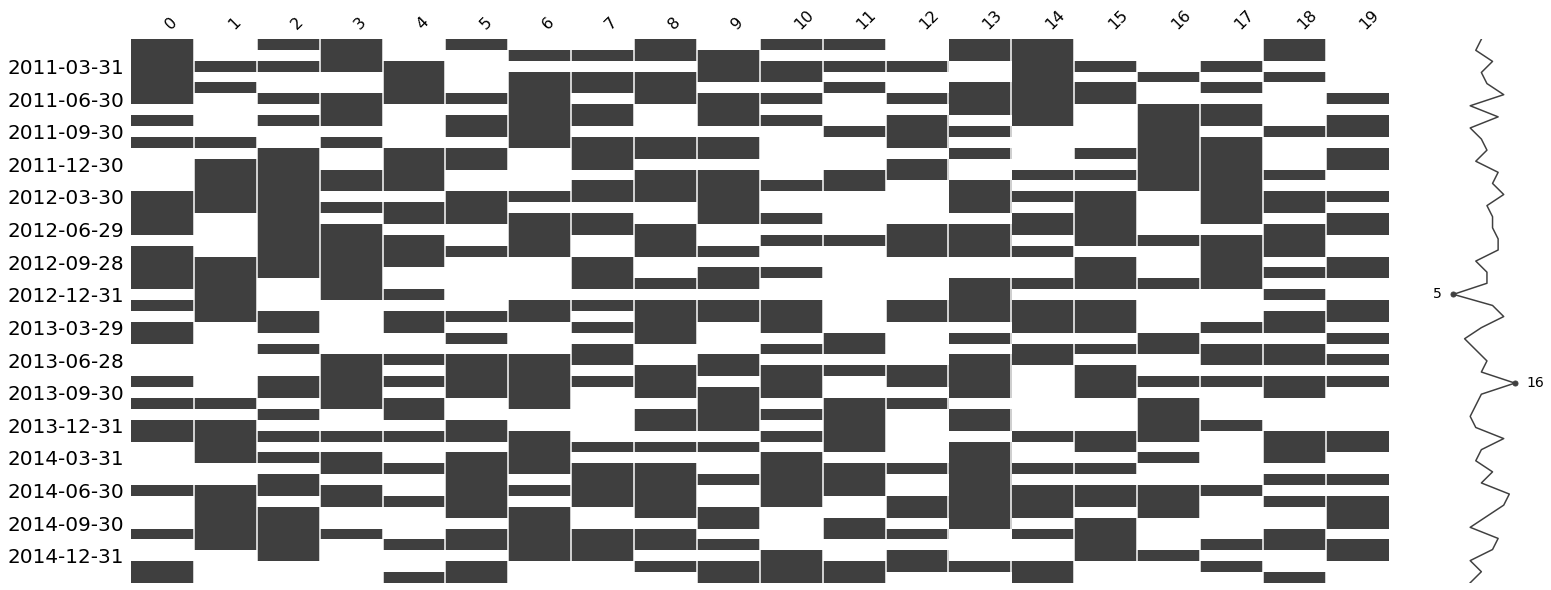

In [ ]:
'''This visualization will comfortably accommodate up to 50 labelled variables
The sparkline at right summarizes the general shape of the data completeness
and points out the rows with the maximum and minimum nullity in the dataset.
https://github.com/ResidentMario/missingno'''

null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')


In [ ]:
print(df_adtte[df_adtte['RACEGR1'].isna()])

Empty DataFrame
Columns: [STUDYID, USUBJID, SUBJID, INVID, RANDDT, ITTFL, SAFFL, TRTP, TRTPN, TRTA, TRTAN, PTAXN, PTAX, VMETAN, VMETA, HRN, HR, GEOREGN, GEOREG, RACE, RACEN, RACEGR1, RACEGR1N, AGEGR1, AGEGR1N, ECOGGR1, ECOGGR1N, REGST, REGSTN, NBSTGR1, NBSTGR1N, LESTYP, LESTYPN, DFIGR1, DFIGR1N, ERSTGR1, ERSTGR1N, PRSTGR1, PRSTGR1N, TRPNEGFL, PHTXFL, PCTXFL, PACTFL, PAFL, PARAM, PARAMCD, PARAMTYP, PARCAT1, STARTDT, ADT, AVAL, CNSR, EVNTDESC, EVNTDSCN, AVALCAT, AVALCATN, CNSRDSC, CNSRDSCN]
Index: []
